In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.datasets import make_blobs

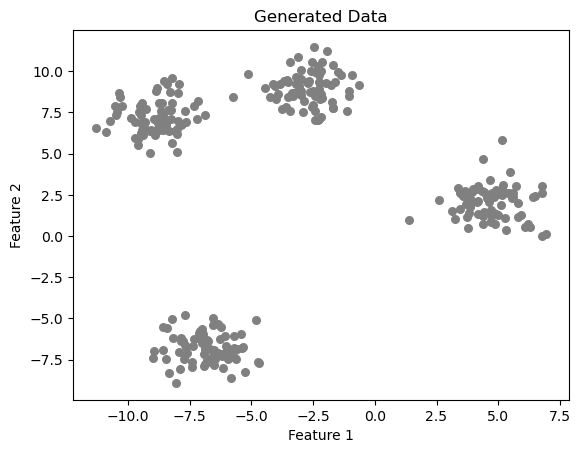

In [3]:
# Generate synthetic dataset
np.random.seed(42)
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Visualize the generated data
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [5]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None
    
    def initialize_centroids(self, data):
        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        return data[random_indices]
    
    def assign_clusters(self, data):
        clusters = [[] for _ in range(self.k)]
        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(idx)
        return clusters
    
    def update_centroids(self, data):
        centroids = np.zeros((self.k, data.shape[1]))
        for cluster_idx, cluster in enumerate(self.clusters):
            if len(cluster) > 0:
                new_centroid = np.mean(data[cluster], axis=0)
                centroids[cluster_idx] = new_centroid
        return centroids
    
    def predict(self, data):
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            new_centroids = self.update_centroids(data)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
    
    def get_cluster_labels(self, data):
        labels = np.empty(data.shape[0])
        for cluster_idx, cluster in enumerate(self.clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels.astype(int)


In [6]:
k = 4
kmeans = KMeans(k=k, max_iters=100)
kmeans.predict(data)
labels = kmeans.get_cluster_labels(data)


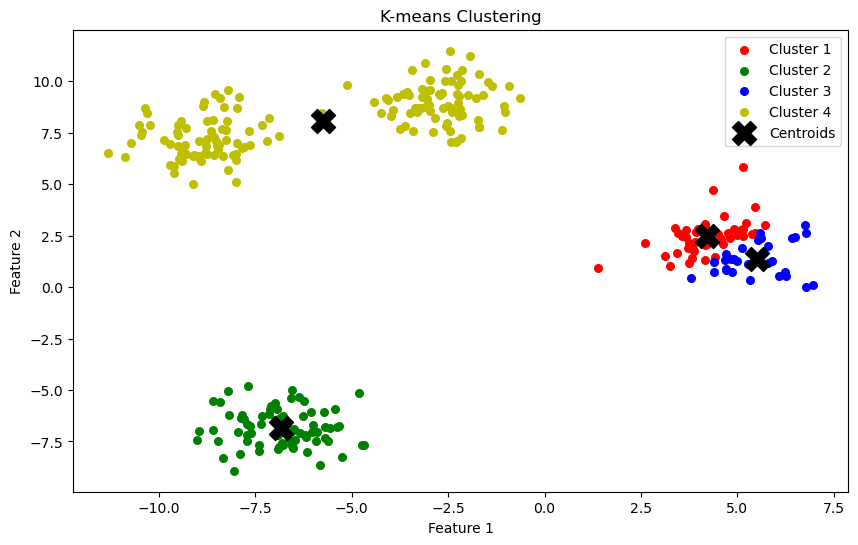

In [7]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k):
    points = data[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [8]:
# K-medoids Clustering class
class KMedoids:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.medoids = None
        self.clusters = None
    
    def initialize_medoids(self, data):
        # Randomly select k medoids from the dataset
        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        return data[random_indices]
    
    def assign_clusters(self, data):
        # Assign each data point to the closest medoid
        clusters = [[] for _ in range(self.k)]
        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, medoid) for medoid in self.medoids]
            closest_medoid = np.argmin(distances)
            clusters[closest_medoid].append(idx)
        return clusters
    
    def update_medoids(self, data):
        # Update medoids by selecting the point with the minimum total distance to others in each cluster
        new_medoids = np.zeros((self.k, data.shape[1]))
        for idx, cluster in enumerate(self.clusters):
            if len(cluster) > 0:
                distances = np.zeros(len(cluster))
                for i, idx1 in enumerate(cluster):
                    # Sum of distances from this point to all other points in the cluster
                    distances[i] = np.sum([euclidean_distance(data[idx1], data[idx2]) for idx2 in cluster])
                new_medoid = data[cluster[np.argmin(distances)]]
                new_medoids[idx] = new_medoid
        return new_medoids
    
    def predict(self, data):
        # Fit the K-medoids model to the data
        self.medoids = self.initialize_medoids(data)
        for _ in range(self.max_iters):
            # Step 1: Assign clusters
            self.clusters = self.assign_clusters(data)
            # Step 2: Update medoids
            new_medoids = self.update_medoids(data)
            # Check for convergence
            if np.all(new_medoids == self.medoids):
                break
            self.medoids = new_medoids
    
    def get_cluster_labels(self, data):
        # Get the cluster labels for each data point
        labels = np.empty(data.shape[0])
        for cluster_idx, cluster in enumerate(self.clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels.astype(int)


In [9]:
k = 4
kmedoids = KMedoids(k=k, max_iters=100)
kmedoids.predict(data)
labels = kmedoids.get_cluster_labels(data)


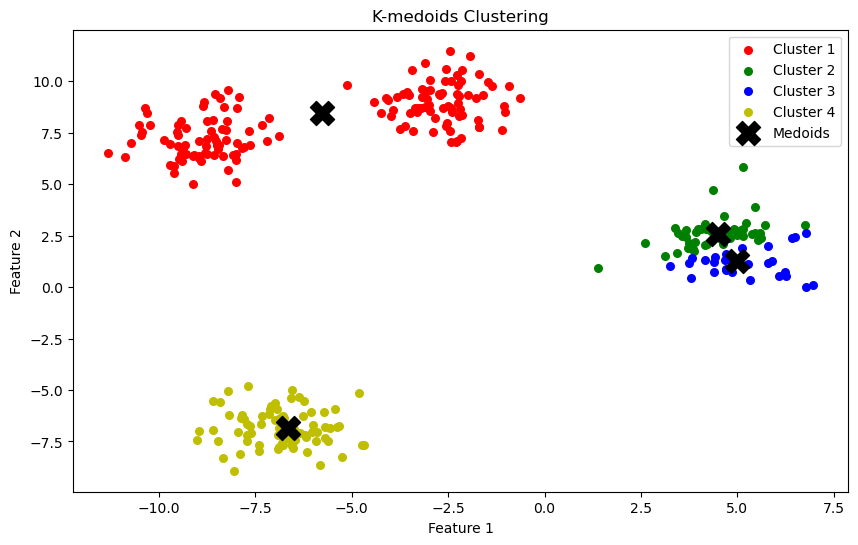

In [10]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k):
    points = data[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmedoids.medoids[:, 0], kmedoids.medoids[:, 1], s=300, c='black', marker='X', label='Medoids')
plt.title("K-medoids Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
